In [1]:
# %cd drive/My\ Drive/Travancore\ Analytics/work/TA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings("ignore")

In [7]:
pd.__version__

'0.24.2'

In [5]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)

In [8]:
#loading data
df=pd.read_csv('data/Iris.csv')
print("Number of records : ",df.shape[0])
print("Number of features : ",df.shape[1]-1)
df.head()

Number of records :  150
Number of features :  5


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['Species'].value_counts()#target

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

our target variable contains data of  3 different species with balanced data having 50 records each.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


All the features are of type 'float'. Id is int which will be excempted

In [11]:
df.drop(columns=['Id'],inplace=True)

In [12]:
df.isnull().sum()#checking null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values present

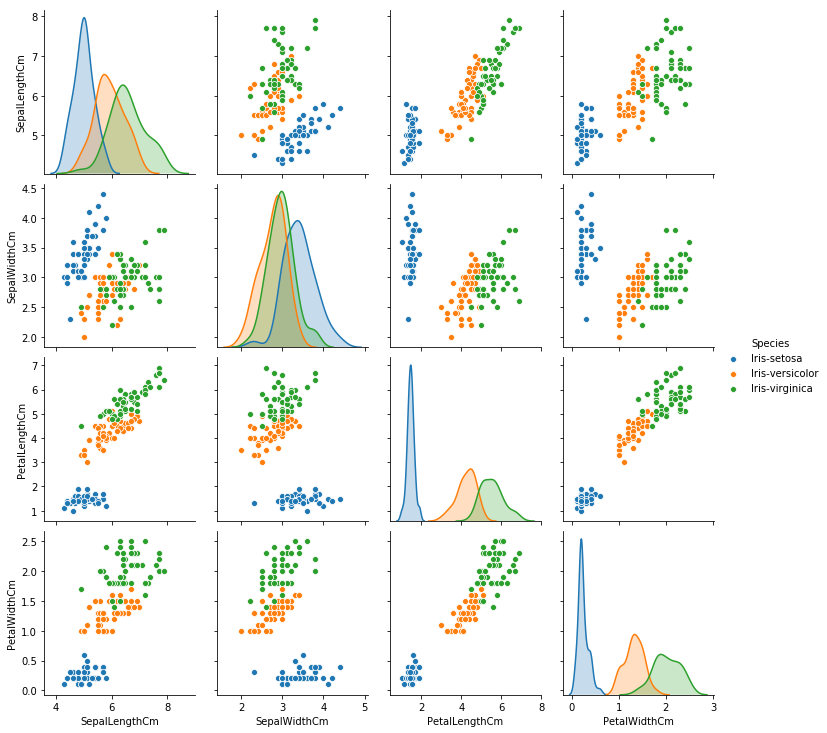

In [13]:
sns.pairplot(df,hue='Species')

we can see the distributions of each group are quiet discriminating and follows gaussian distribution. Hence the features are good for modeling(especially linear models)

In [14]:
# creating dependent variable 'y' and feature 'X' for building the classifier
X = df.drop(columns=['Species'])
y = df['Species']

In [16]:
#standardizing the values before processing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in X.columns:
    X[i] =sc.fit_transform(X[[i]])
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Model building


##### importing different classifiers and try all and find out the best algorithm  

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score

In [21]:
#with default parameters
lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=5)
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bg=BaggingClassifier()
ab=AdaBoostClassifier()

In [22]:
models = []
models.append(('LogisticRegression',lr))
models.append(('KNeighborsClassifier',knn))
models.append(('GaussianNB',nb))
models.append(('DecisionTreeClassifier',dt))
models.append(('RandomForestClassifier',rf))
models.append(('BaggingClassifier',bg))
models.append(('AdaBoostClassifier',ab))

In [23]:
results = []
names = []
for name, model in models:
    auc = cross_val_score(model,X,y,cv=5,scoring='f1_weighted')
    results.append(auc)
    names.append(name)
    print('%s: %f' % (name,np.mean(auc*100)))
    BE =1-np.mean(auc)#Bias error
    VE =np.var(1-auc,ddof=1)#variance error
    print("\t\tBais error : ", BE)
    print("\t\tVariance error: ",VE)

LogisticRegression: 95.979849
		Bais error :  0.04020151388572446
		Variance error:  0.0019051879431163602
KNeighborsClassifier: 95.983190
		Bais error :  0.0401680970102023
		Variance error:  0.0007862810415070918
GaussianNB: 95.304726
		Bais error :  0.04695273537378808
		Variance error:  0.0009019261393578371
DecisionTreeClassifier: 95.324979
		Bais error :  0.0467502088554721
		Variance error:  0.0014500243926440966
RandomForestClassifier: 95.311511
		Bais error :  0.04688488899015231
		Variance error:  0.0014568209643883916
BaggingClassifier: 95.283956
		Bais error :  0.04716044159845478
		Variance error:  0.0015057349049318843
AdaBoostClassifier: 94.633047
		Bais error :  0.05366952735373798
		Variance error:  0.0014585385508706548


from the above analysis we can select our final model as 'KNeighborsClassifier' with 95.98 % accuracy and low errors

## Model evaluation

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.33)

In [25]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
ypred = model.predict(xtest)

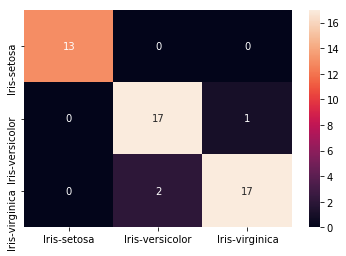

In [27]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(ytest, ypred)
import seaborn as sns
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
sns.heatmap(cf_matrix, annot=True, xticklabels=list(np.unique(ypred)),yticklabels=list(np.unique(ypred)))

there are totally 3 records in test data which got misclassified

In [29]:
# print("Accuracy : ",accuracy_score(ytest,ypred))
# print("Recall score :",recall_score(ytest,ypred,average ='micro'))
# print("Precision score",precision_score(ytest,ypred,average ='micro'))
print("f1 score :",f1_score(ytest,ypred,average ='micro'))

f1 score : 0.94
